<a href="https://colab.research.google.com/github/goodbamm/CNN-based-Celebrity-Classification-AI-Service-Using-Transfer-Learning/blob/main/3%EB%B6%84_%EB%A7%8C%EC%97%90_%EB%A7%8C%EB%93%9C%EB%8A%94_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%84%9C%EB%B9%84%EC%8A%A4_%EC%8A%AC%EA%B8%B0_%EC%A0%9C%EB%8B%88_%EC%98%88%EC%A7%80_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>3분 만에 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기</b>
### <b>동빈나님의 코드를 통해 학습하기 위해 일부 수정하였음을 밝힙니다.</b>


* 본 프로젝트에서는 세 가지 기능을 합쳐서 순식간에 상용 인공지능 서비스를 제작합니다.
    1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리
    2. 전이 학습(transfer learning)
    3. 웹 API 개발
* 이 프로젝트에서 만들어 볼 것은 <b>슬기/제니/예지</b> 분류기(classifier)입니다.
* 단 <b>3분</b> 만에 인공지능 개발의 전체 과정을 진행합니다.
    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행해야 합니다.

In [ ]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 86 (delta 38), reused 45 (delta 16), pack-reused 0
Unpacking objects: 100% (86/86), done.


#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [ ]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

* <b>슬기</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [ ]:
query = 'seulgi'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 41 Images on Page 1.
#1 이미지 다운로드 (https://lh3.googleusercontent.com/TLtKgtKaPEVaTJyXGqjurOAozwibRa8Krcz56LKpBBBkWlgU4hAcsNQrF-KqjwrScMQKXc5EIh8rXTthPOg2KucP3unQEy9mfA=w1600-rj)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://qph.fs.quoracdn.net/main-qimg-2b2638a5849ac46fde1e06f7724a1b39)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.pinimg.com/originals/d7/32/95/d73295ad732b3d0c605d38a062e352e2.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://cdn.brilio.net/news/2019/02/11/159184/989399-transformasi-kang-seulgi.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://upload.wikimedia.org/wikipedia/commons/6/6d/Kang_Seul-gi_at_Incheon_Airport_on_September_2%2C_2019.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://dbkpop.com/wp-content/uploads/2017/11/red_velvet_perfect_velvet_seulgi_2.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://2.bp.blogspot.com/-AYlsSlEd8yo/Vl0RWYDF2BI/AAAAAAAANeE/yWvXU-fnTEo/s1600/bms_rv_seulgi_1.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://cdn-br

* <b>제니</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [ ]:
query = 'jennie'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 47 Images on Page 1.
#1 이미지 다운로드 (https://upload.wikimedia.org/wikipedia/commons/9/99/Jennie_Kim_for_Marie_Claire_Korea_Magazine_on_October_9%2C_2018_(5).png)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://upload.wikimedia.org/wikipedia/commons/1/11/Jennie_at_the_Sprite_Waterbomb_Festival_2018_(1).jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://upload.wikimedia.org/wikipedia/commons/e/ec/Jennie_at_a_fansigning_event_on_June_24%2C_2018.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/20190106_(NEWSEN)_블랙핑크(BLACKPINK)%2C_수줍은_많은_소녀지만_돋보이는_아름다운_미모_(Golden_Disc_Awards_2019)_(9).jpg/220px-20190106_(NEWSEN)_블랙핑크(BLACKPINK)%2C_수줍은_많은_소녀지만_돋보이는_아름다운_미모_(Golden_Disc_Awards_2019)_(9).jpg)
[Info] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/20190106_(NEWSEN)_블랙핑크(BLACKPINK)%2C_수줍은_많은_소녀지만_돋보이는_아름다운_미모_(Golden_Disc_Awards_2019)_(9).jpg/220px-20190106_(NEWSEN)_블랙핑크(BLACKPINK)%2C_수줍은_많은_소녀지만_돋

* <b>예지</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [ ]:
query = 'yeji'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://biaswrecker.com/wp-content/uploads/2020/03/4c05e05db758e1481ba9104aeb4735d1.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://biaswrecker.com/wp-content/uploads/2020/07/34f7a62e51a95f89fb7cd6bf42e70b86.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.redd.it/5le4av1nwc741.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://2.bp.blogspot.com/-DkdWj7Gr4tI/XYDMWU9HfmI/AAAAAAAAHL4/ZWnr4Mw9-y8n4Ge3h1F92bIH4Emu6xgQACLcBGAsYHQ/s1600/YEJI%2BITZY%2B32.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://lh3.googleusercontent.com/LXA2dI5pBssm3rJU86G28wBrsfojv4vX93w-1-TEP5iiI6NM5d9EXXdlu0ztjjz3sxfk2SXbz3FXbohhFm2Pc1rLGXrNnKnygw=w1600-rj)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://mocah.org/uploads/posts/330802-ITZY-ICY-Yeji-Pigtail-4K-iphone-wallpaper.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://k-luv.leonparenzo.com/wp-content/uploads/2020/03/someone-edited-full-bangs-on-itzys-yeji-and-youll-want-her-to-try-out-the-look-in-real-

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

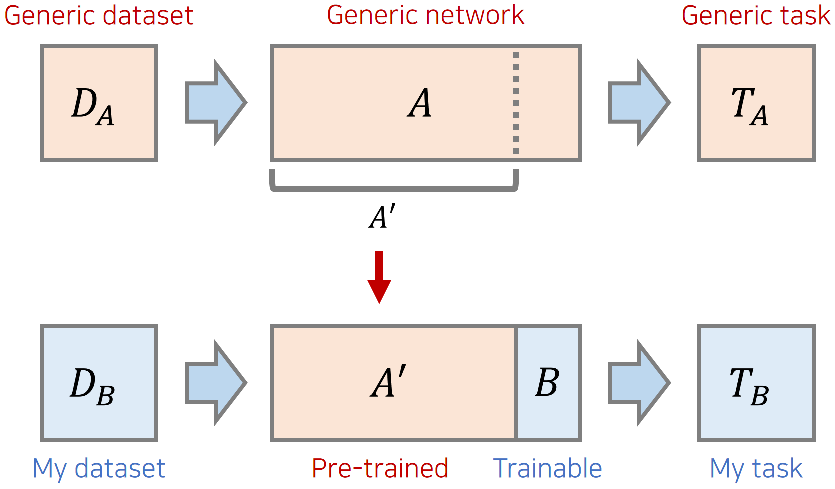

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [ ]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 84
테스트 데이터셋 크기: 29
클래스: ['jennie', 'seulgi', 'yeji']


* 간단히 이미지를 시각화해 봅시다.

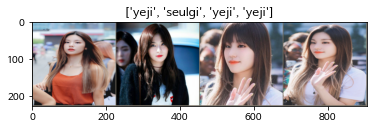

In [ ]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [ ]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


* 학습을 진행합니다.

In [ ]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.1700 Acc: 32.1429% Time: 3.2347s
#1 Loss: 0.6565 Acc: 75.0000% Time: 6.4308s
#2 Loss: 0.3534 Acc: 89.2857% Time: 9.5975s
#3 Loss: 0.2440 Acc: 90.4762% Time: 12.8004s
#4 Loss: 0.3282 Acc: 88.0952% Time: 16.0326s
#5 Loss: 0.3435 Acc: 82.1429% Time: 19.2504s
#6 Loss: 0.5915 Acc: 78.5714% Time: 22.5135s
#7 Loss: 0.2525 Acc: 90.4762% Time: 25.7807s
#8 Loss: 0.2163 Acc: 90.4762% Time: 29.0395s
#9 Loss: 0.3894 Acc: 88.0952% Time: 32.3221s
#10 Loss: 0.1666 Acc: 96.4286% Time: 35.6081s
#11 Loss: 0.4223 Acc: 91.6667% Time: 38.9184s
#12 Loss: 0.4067 Acc: 90.4762% Time: 42.0683s
#13 Loss: 0.2898 Acc: 90.4762% Time: 45.3052s
#14 Loss: 0.2437 Acc: 90.4762% Time: 48.5469s
#15 Loss: 0.2056 Acc: 86.9048% Time: 51.8052s
#16 Loss: 0.1591 Acc: 95.2381% Time: 55.1074s
#17 Loss: 0.1984 Acc: 94.0476% Time: 58.2837s
#18 Loss: 0.2767 Acc: 88.0952% Time: 61.4058s
#19 Loss: 0.6287 Acc: 80.9524% Time: 64.5668s
#20 Loss: 0.2155 Acc: 94.0476% Time: 67.7496s
#21 Loss: 0.2957 Acc: 85.7143% Time: 70.9157s
#

* 학습된 모델을 평가합니다.

[예측 결과: yeji] (실제 정답: yeji)


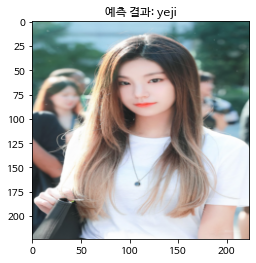

[예측 결과: seulgi] (실제 정답: seulgi)


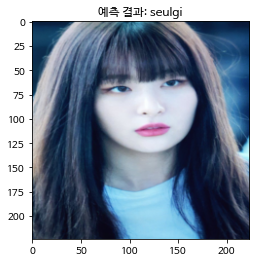

[예측 결과: seulgi] (실제 정답: yeji)


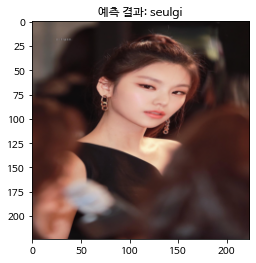

[예측 결과: seulgi] (실제 정답: seulgi)


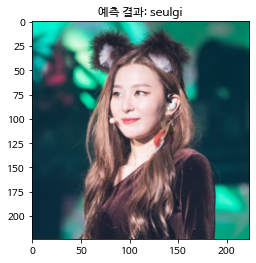

[예측 결과: seulgi] (실제 정답: seulgi)


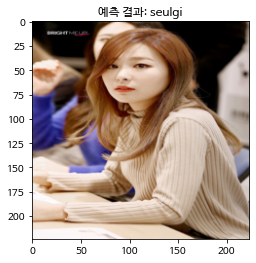

[예측 결과: seulgi] (실제 정답: seulgi)


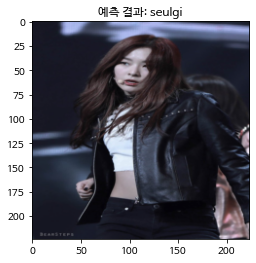

[예측 결과: yeji] (실제 정답: yeji)


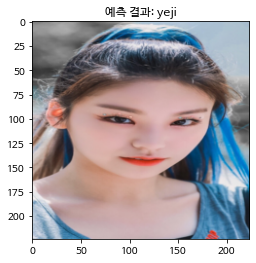

[예측 결과: jennie] (실제 정답: jennie)


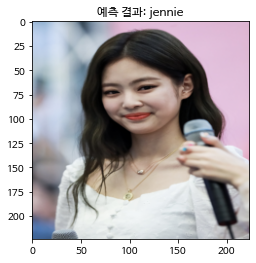

[Test Phase] Loss: 0.6274 Acc: 79.3103% Time: 2.6384s


In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://images.genius.com/d3fdda44ba34122f1abf96a580e877d1.777x777x1.jpg -O test_image.jpg

--2021-03-01 09:23:40--  https://images.genius.com/d3fdda44ba34122f1abf96a580e877d1.777x777x1.jpg
Resolving images.genius.com (images.genius.com)... 104.18.18.96, 104.18.19.96, 2606:4700::6812:1360, ...
Connecting to images.genius.com (images.genius.com)|104.18.18.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75638 (74K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  73.87K  --.-KB/s    in 0.002s  

2021-03-01 09:23:40 (42.3 MB/s) - ‘test_image.jpg’ saved [75638/75638]



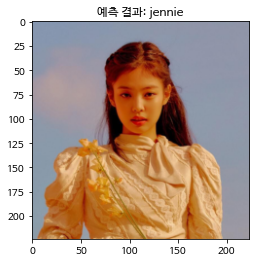

In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [ ]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

In [ ]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c4cdb8de3a35.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


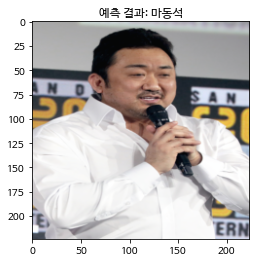

127.0.0.1 - - [23/Feb/2021 08:06:33] "POST / HTTP/1.1" 200 -


결과: {'class_name': '마동석'}


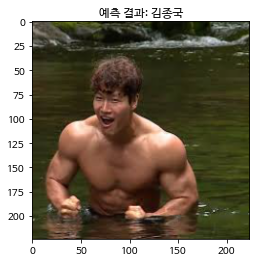

127.0.0.1 - - [23/Feb/2021 08:06:51] "POST / HTTP/1.1" 200 -


결과: {'class_name': '김종국'}


In [ ]:
run_with_ngrok(app)
app.run()

* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발할 수 있습니다.